# EDA(Exploratory Data Analysis)_on IPL(Indian Premier League)_Data

## Problem Statement

The objective of this analysis is to explore and uncover key patterns, trends, and insights from IPL data. The aim is to answer questions such as:

What factors influence match outcomes?
How do teams and players perform across different seasons?
Are there identifiable trends or outliers in team performance, player contributions, or match results?
This analysis will involve data preprocessing, statistical exploration, and visualization techniques to derive actionable insights and present findings effectively.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

To carry out the analysis, we imported essential Python libraries that provide powerful tools for data manipulation, visualization, and analysis:

NumPy (numpy):

Provides support for large multi-dimensional arrays and matrices.
Offers mathematical functions to perform operations on these arrays.
Pandas (pandas):

A data manipulation and analysis library.
Facilitates working with structured data through DataFrames and Series.
Used for loading, cleaning, and preprocessing the dataset.
Seaborn (seaborn):

A visualization library built on top of Matplotlib.
Provides aesthetically pleasing and informative statistical graphics.
Used to create plots like histograms, boxplots, and heatmaps for EDA.
Matplotlib (pyplot):

A foundational plotting library for Python.
Used to create static, interactive, and animated visualizations.
Complements Seaborn for customization of visual outputs.

## Data Collection and Processing

In [2]:
# Load the CSV file into a Pandas DataFrame

file_path = "D:\\matches.csv"  


In [3]:
df = pd.read_csv(file_path)

In [4]:
# Understand the structure of the data

# Display the first 5 rows

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
# Display summary information about the DataFrame

print("\nSummary of the dataset:")
df.info()


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   int64  
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   ob

In [6]:
# Display basic statistical details for numerical columns

print("\nDescriptive statistics of the dataset:")
df.describe()


Descriptive statistics of the dataset:


,id,season,result_margin,target_runs,target_overs
count,1.095000e+03,1095.000000,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,2016.126027,17.259294,165.684066,19.759341
std,3.677402e+05,4.946940,21.787444,33.427048,1.581108
min,3.359820e+05,2008.000000,1.000000,43.000000,5.000000
25%,5.483315e+05,2012.000000,6.000000,146.000000,20.000000
50%,9.809610e+05,2016.000000,8.000000,166.000000,20.000000
75%,1.254062e+06,2021.000000,20.000000,187.000000,20.000000
max,1.426312e+06,2024.000000,146.000000,288.000000,20.000000


In [7]:
# Check for missing values 

print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [8]:
df = df.drop(["method"],axis=1)

In [9]:
# Handling missing values

# Fill missing 'city' values with 'Unknown'

df['city'] = df['city'].fillna('Unknown')

In [10]:
missing_winner = df[df['winner'].isna()]
missing_winner

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
241,501265,2011,Delhi,21-05-2011,League,NaN,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,NaN,no result,NaN,NaN,NaN,N,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,29-04-2015,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,NaN,NaN,N,JD Cloete,PG Pathak
511,829813,2015,Bangalore,17-05-2015,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,HDPK Dharmasena,K Srinivasan
744,1178424,2019,Bengaluru,30-04-2019,League,NaN,M.Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,NaN,no result,NaN,63.0,5.0,N,NJ Llong,UV Gandhe
994,1359519,2023,Lucknow,03-05-2023,League,NaN,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,NaN,no result,NaN,NaN,NaN,N,AK Chaudhary,NA Patwardhan


In [11]:
df = df.dropna(subset=['winner'])

In [12]:
df.isna().sum()

id                  0
season              0
city                0
date                0
match_type          0
player_of_match     0
venue               0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              0
result              0
result_margin      14
target_runs         0
target_overs        0
super_over          0
umpire1             0
umpire2             0
dtype: int64

In [13]:
missing_result_margin = df[df['result_margin'].isna()]
missing_result_margin

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
66,392190,2009,Cape Town,23-04-2009,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,MR Benson,M Erasmus
130,419121,2010,Chennai,21-03-2010,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,K Hariharan,DJ Harper
328,598004,2013,Hyderabad,07-04-2013,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,16-04-2013,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,29-04-2014,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,21-04-2015,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,M Erasmus,S Ravi
610,1082625,2017,Rajkot,29-04-2017,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,AK Chaudhary,CB Gaffaney
705,1175365,2019,Delhi,30-03-2019,League,PP Shaw,Arun Jaitley Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,tie,NaN,186.0,20.0,Y,AY Dandekar,Nitin Menon
746,1178426,2019,Mumbai,02-05-2019,League,JJ Bumrah,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,163.0,20.0,Y,CK Nandan,S Ravi
757,1216493,2020,Unknown,20-09-2020,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,158.0,20.0,Y,AK Chaudhary,Nitin Menon


In [14]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,19-05-2024,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,21-05-2024,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,22-05-2024,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,24-05-2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


In [15]:
df['result_margin'].fillna(0 , inplace=True )

In [16]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,19-05-2024,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,21-05-2024,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,22-05-2024,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,24-05-2024,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


In [17]:
df.isna().sum()

id                 0
season             0
city               0
date               0
match_type         0
player_of_match    0
venue              0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
target_runs        0
target_overs       0
super_over         0
umpire1            0
umpire2            0
dtype: int64

In [18]:
df.dtypes

id                   int64
season               int64
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
umpire1             object
umpire2             object
dtype: object

In [19]:
# Convert 'date' column to datetime

df['date'] = pd.to_datetime(df['date'])

In [20]:
df.dtypes

id                          int64
season                      int64
city                       object
date               datetime64[ns]
match_type                 object
player_of_match            object
venue                      object
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
target_runs               float64
target_overs              float64
super_over                 object
umpire1                    object
umpire2                    object
dtype: object

In [21]:
# Remove duplicate rows, if any

print("\nNumber of duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Number of duplicate rows: 0


In [22]:
#  Recheck for issues

print("\nUpdated Dataset Info:")
df.info()




Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1090 non-null   int64         
 1   season           1090 non-null   int64         
 2   city             1090 non-null   object        
 3   date             1090 non-null   datetime64[ns]
 4   match_type       1090 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1090 non-null   object        
 7   team1            1090 non-null   object        
 8   team2            1090 non-null   object        
 9   toss_winner      1090 non-null   object        
 10  toss_decision    1090 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1090 non-null   object        
 13  result_margin    1090 non-null   float64       
 14  target_runs      1090 

In [23]:
# Preview the cleaned dataset

print("\nCleaned Dataset (first five rows):")
df.head()


Cleaned Dataset (first five rows):


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan


In [24]:
# statistical details for numerical columns

print("\nDescriptive statistics of the dataset:")
df.describe()


Descriptive statistics of the dataset:


,id,season,date,result_margin,target_runs,target_overs
count,1.090000e+03,1090.000000,1090,1090.000000,1090.000000,1090.000000
mean,9.046681e+05,2016.123853,2016-06-24 16:57:14.862385408,17.037615,165.757798,19.772661
min,3.359820e+05,2008.000000,2008-04-18 00:00:00,0.000000,43.000000,5.000000
25%,5.483312e+05,2012.000000,2012-04-21 00:00:00,5.000000,146.000000,20.000000
50%,9.809620e+05,2016.000000,2016-05-03 12:00:00,8.000000,166.000000,20.000000
75%,1.254063e+06,2021.000000,2021-04-13 18:00:00,19.750000,187.000000,20.000000
max,1.426312e+06,2024.000000,2024-05-26 00:00:00,146.000000,288.000000,20.000000
std,3.680153e+05,4.950469,NaN,21.734086,33.305775,1.517969


In [25]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


## Exploratory Data Analysis (EDA)

The EDA process is aimed at uncovering meaningful patterns and relationships within the IPL data by systematically analyzing the data through various statistical and visual methods.



### Summary Statistics

This step involves presenting an overview of the dataset using statistical measures such as mean, median, mode, standard deviation, and percentiles. It provides a snapshot of key metrics like average runs scored, total wickets taken, and match durations, helping to understand the central tendency and variability within the data.

In [26]:
# Summary statistics for numerical columns

summary_stats = df.describe()
print("Summary Statistics:\n") 

summary_stats



Summary Statistics:



,id,season,date,result_margin,target_runs,target_overs
count,1.090000e+03,1090.000000,1090,1090.000000,1090.000000,1090.000000
mean,9.046681e+05,2016.123853,2016-06-24 16:57:14.862385408,17.037615,165.757798,19.772661
min,3.359820e+05,2008.000000,2008-04-18 00:00:00,0.000000,43.000000,5.000000
25%,5.483312e+05,2012.000000,2012-04-21 00:00:00,5.000000,146.000000,20.000000
50%,9.809620e+05,2016.000000,2016-05-03 12:00:00,8.000000,166.000000,20.000000
75%,1.254063e+06,2021.000000,2021-04-13 18:00:00,19.750000,187.000000,20.000000
max,1.426312e+06,2024.000000,2024-05-26 00:00:00,146.000000,288.000000,20.000000
std,3.680153e+05,4.950469,NaN,21.734086,33.305775,1.517969


In [27]:
# Calculating mean, median, and standard deviation for key metrics

key_metrics = ['result_margin', 'target_runs', 'target_overs']  # Specify your key numerical columns
for metric in key_metrics:
    mean_value = df[metric].mean()
    median_value = df[metric].median()
    std_value = df[metric].std()
    print(f"\n{metric}:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Median: {median_value:.2f}")
    print(f"Standard Deviation: {std_value:.2f}")


result_margin:
Mean: 17.04
Median: 8.00
Standard Deviation: 21.73

target_runs:
Mean: 165.76
Median: 166.00
Standard Deviation: 33.31

target_overs:
Mean: 19.77
Median: 20.00
Standard Deviation: 1.52


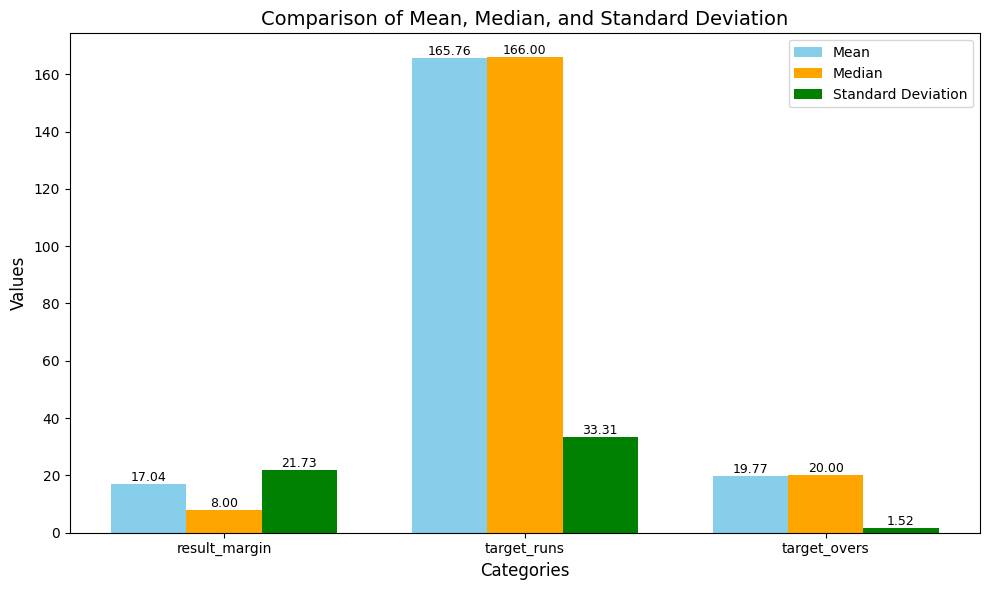

In [28]:
categories = ['result_margin', 'target_runs', 'target_overs']
mean_values = [17.04, 165.76, 19.77]
median_values = [8.00, 166.00, 20.00]
std_dev_values = [21.73, 33.31, 1.52]

# Setting bar width and positions

bar_width = 0.25
x = np.arange(len(categories))

# Plot

plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, mean_values, width=bar_width, label='Mean', color='skyblue')
plt.bar(x, median_values, width=bar_width, label='Median', color='orange')
plt.bar(x + bar_width, std_dev_values, width=bar_width, label='Standard Deviation', color='green')

# Labels and title

plt.xlabel('Categories', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Comparison of Mean, Median, and Standard Deviation', fontsize=14)
plt.xticks(x, categories, fontsize=10)
plt.legend(fontsize=10)

# Adding value labels on bars

for i, v in enumerate(mean_values):
    plt.text(x[i] - bar_width, v + 1, f"{v:.2f}", ha='center', fontsize=9)
for i, v in enumerate(median_values):
    plt.text(x[i], v + 1, f"{v:.2f}", ha='center', fontsize=9)
for i, v in enumerate(std_dev_values):
    plt.text(x[i] + bar_width, v + 1, f"{v:.2f}", ha='center', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


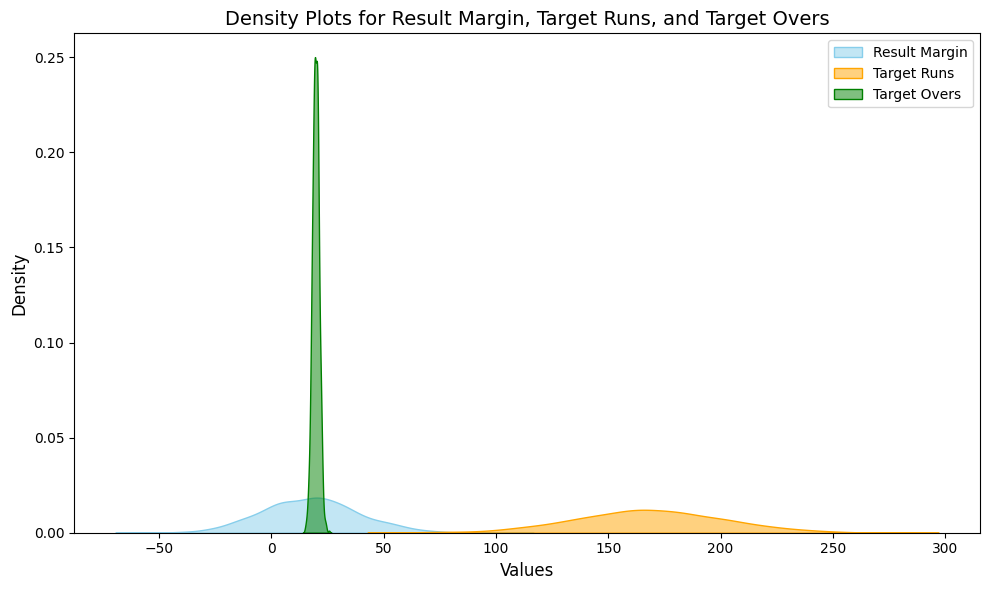

In [29]:
# Generating synthetic data based on mean and standard deviation

np.random.seed(42)
result_margin = np.random.normal(loc=17.04, scale=21.73, size=1000)
target_runs = np.random.normal(loc=165.76, scale=33.31, size=1000)
target_overs = np.random.normal(loc=19.77, scale=1.52, size=1000)

# Plotting density plots

plt.figure(figsize=(10, 6))
sns.kdeplot(result_margin, label='Result Margin', fill=True, color='skyblue', alpha=0.5)
sns.kdeplot(target_runs, label='Target Runs', fill=True, color='orange', alpha=0.5)
sns.kdeplot(target_overs, label='Target Overs', fill=True, color='green', alpha=0.5)

# Labels and title

plt.xlabel('Values', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Plots for Result Margin, Target Runs, and Target Overs', fontsize=14)
plt.legend(fontsize=10)
plt.tight_layout()

# Show plot

plt.show()


### Univariate Analysis

Univariate analysis focuses on analyzing individual variables to understand their distribution and key characteristics. For instance, analyzing the distribution of runs scored, player strike rates, or the number of sixes hit in matches. Visualizations like histograms, box plots, and density plots help identify patterns and outliers in these variables.

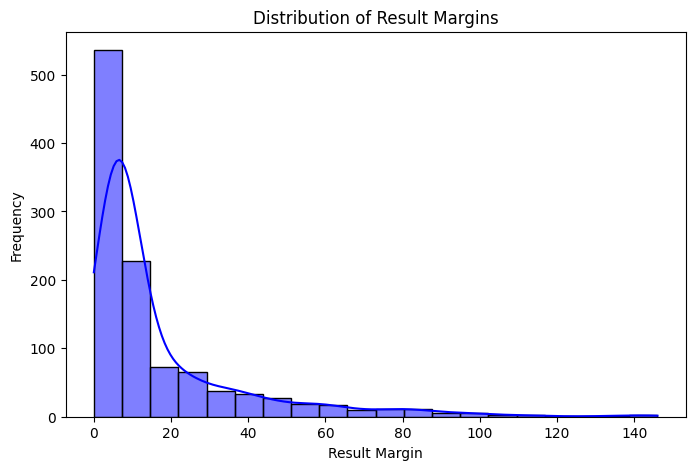

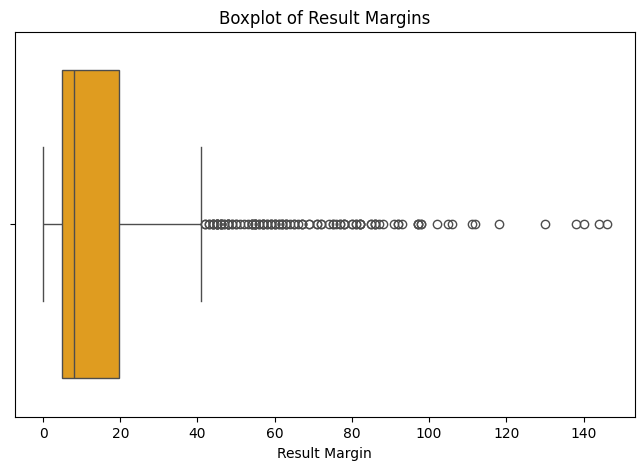

In [30]:
# Histogram for result margins

plt.figure(figsize=(8, 5))
sns.histplot(df['result_margin'], bins=20, kde=True, color='blue')
plt.title('Distribution of Result Margins')
plt.xlabel('Result Margin')
plt.ylabel('Frequency')
plt.show()

# Boxplot for result margins

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['result_margin'], color='orange')
plt.title('Boxplot of Result Margins')
plt.xlabel('Result Margin')
plt.show()



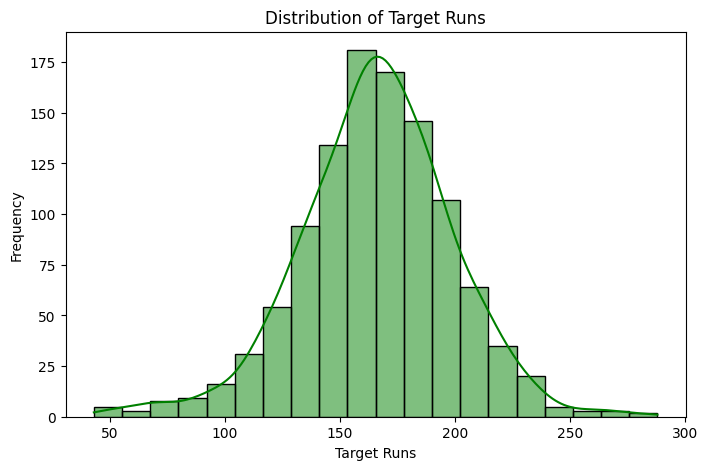

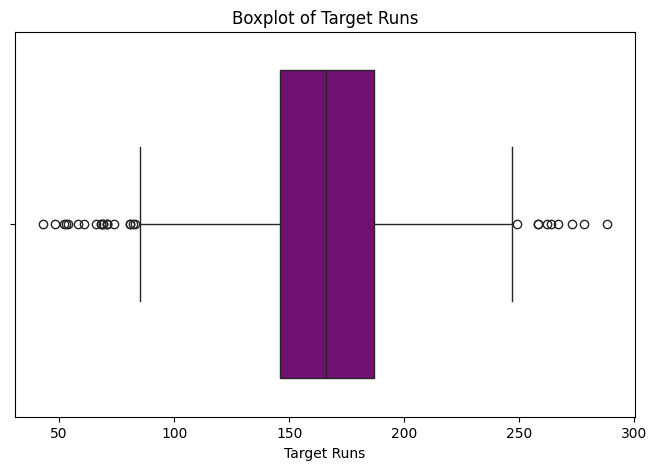

In [31]:
# Histogram for target runs

plt.figure(figsize=(8, 5))
sns.histplot(df['target_runs'], bins=20, kde=True, color='green')
plt.title('Distribution of Target Runs')
plt.xlabel('Target Runs')
plt.ylabel('Frequency')
plt.show()

# Boxplot for target runs

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['target_runs'], color='purple')
plt.title('Boxplot of Target Runs')
plt.xlabel('Target Runs')
plt.show()


### Bivariate Analysis

This analysis studies relationships between two variables to identify correlations or dependencies. Examples include examining how team performance correlates with match outcomes, how toss decisions impact winning probabilities, or the relationship between batting order and runs scored. Scatter plots, heatmaps, and pair plots are used for visualizing these relationships.



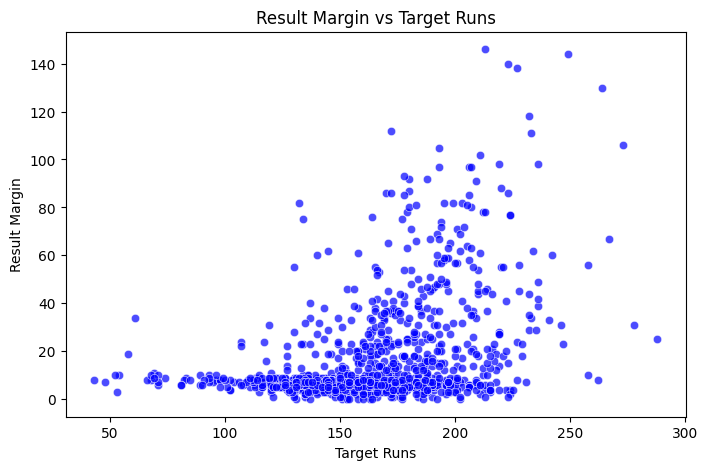

In [32]:
# Scatter plot: Result margin vs Target runs

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['target_runs'], y=df['result_margin'], color='blue', alpha=0.7)
plt.title('Result Margin vs Target Runs')
plt.xlabel('Target Runs')
plt.ylabel('Result Margin')
plt.show()


In [33]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


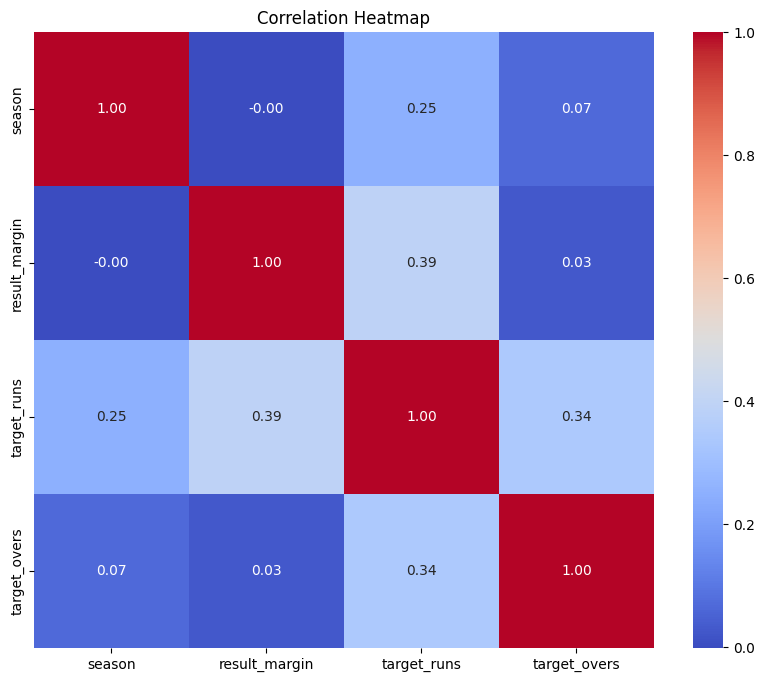

In [34]:
# Heatmap: Correlation between numerical features

# Numarical feature columns

Numarical_Data = df[['season','result_margin','target_runs','target_overs']]

plt.figure(figsize=(10, 8))
correlation_matrix = Numarical_Data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

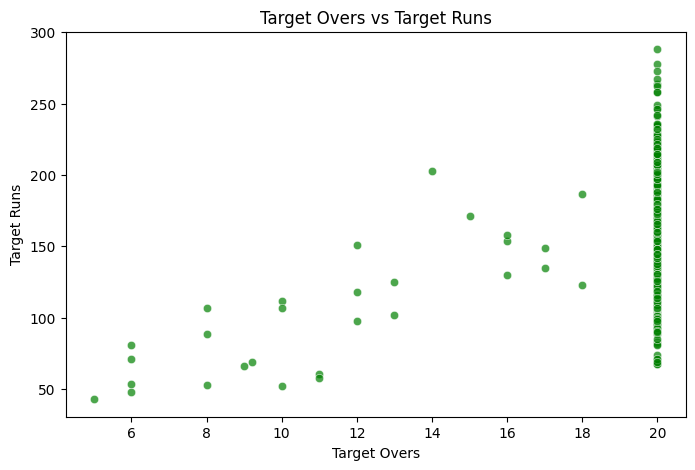

In [35]:
# Example: Scatter plot for Runs vs Overs (if target_overs is relevant)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['target_overs'], y=df['target_runs'], color='green', alpha=0.7)
plt.title('Target Overs vs Target Runs')
plt.xlabel('Target Overs')
plt.ylabel('Target Runs')
plt.show()

### Multivariate Analysis

Multivariate analysis investigates interactions among multiple variables to uncover complex relationships. For example, analyzing how venue conditions, toss decisions, and batting order collectively influence match outcomes. Advanced visualizations such as 3D plots, clustered heatmaps, and grouped bar charts are employed in this step.



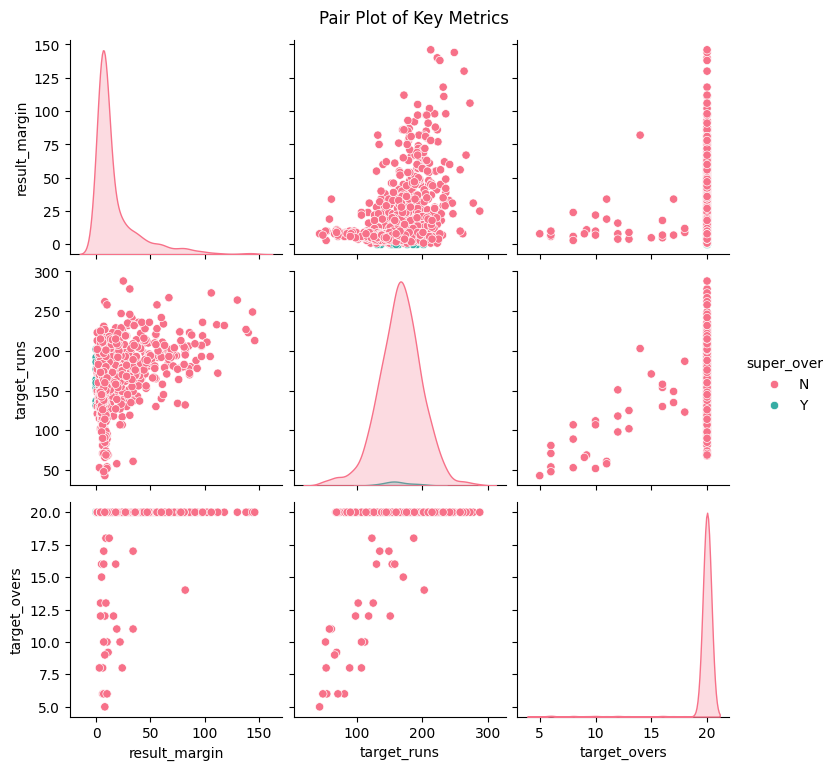

In [36]:
# Pair Plot: Visualize pairwise relationships

sns.pairplot(
    df[['result_margin', 'target_runs', 'target_overs', 'super_over']],
    diag_kind='kde',     # Kernel density estimation on diagonals
    hue='super_over',     # Optional: differentiate by 'super_over'
    palette='husl'
)
plt.suptitle('Pair Plot of Key Metrics', y=1.02)
plt.show()



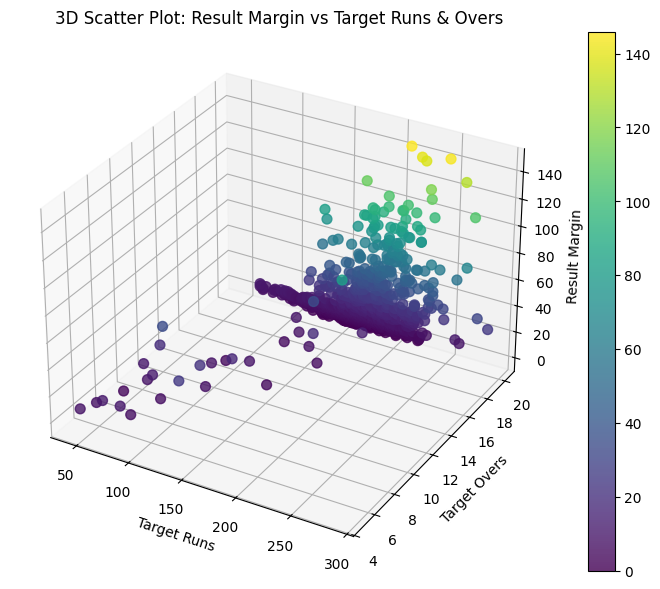

In [37]:
# 3D Scatter Plot: Result Margin, Target Runs, and Target Overs

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for three variables

sc = ax.scatter(
    df['target_runs'], df['target_overs'], df['result_margin'],
    c=df['result_margin'], cmap='viridis', s=50, alpha=0.8
)

# Add axis labels

ax.set_xlabel('Target Runs')
ax.set_ylabel('Target Overs')
ax.set_zlabel('Result Margin')
ax.set_title('3D Scatter Plot: Result Margin vs Target Runs & Overs')
plt.colorbar(sc)
plt.show()


### Specified Cricket Matrics

Cricket-specific metrics like batting strike rates, bowling economy rates, and averages are calculated to evaluate individual and team performances. These metrics provide actionable insights, such as identifying key players, evaluating all-rounder efficiency, or ranking bowlers based on economy rate in death overs.

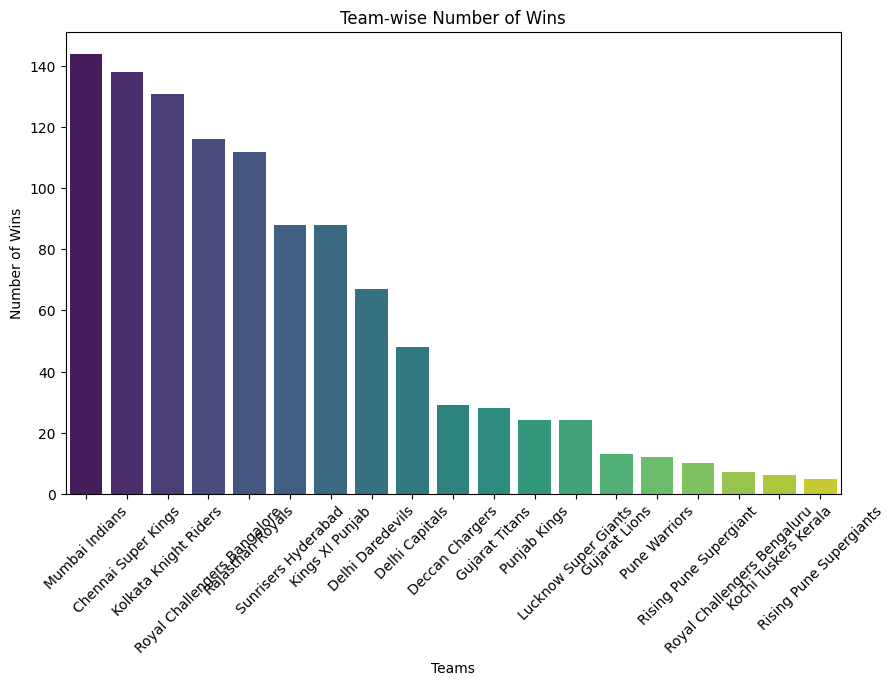

In [38]:
# Team-wise number of wins

plt.figure(figsize=(10, 6))
team_wins = df['winner'].value_counts()
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.title('Team-wise Number of Wins')
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


<Figure size 800x500 with 0 Axes>

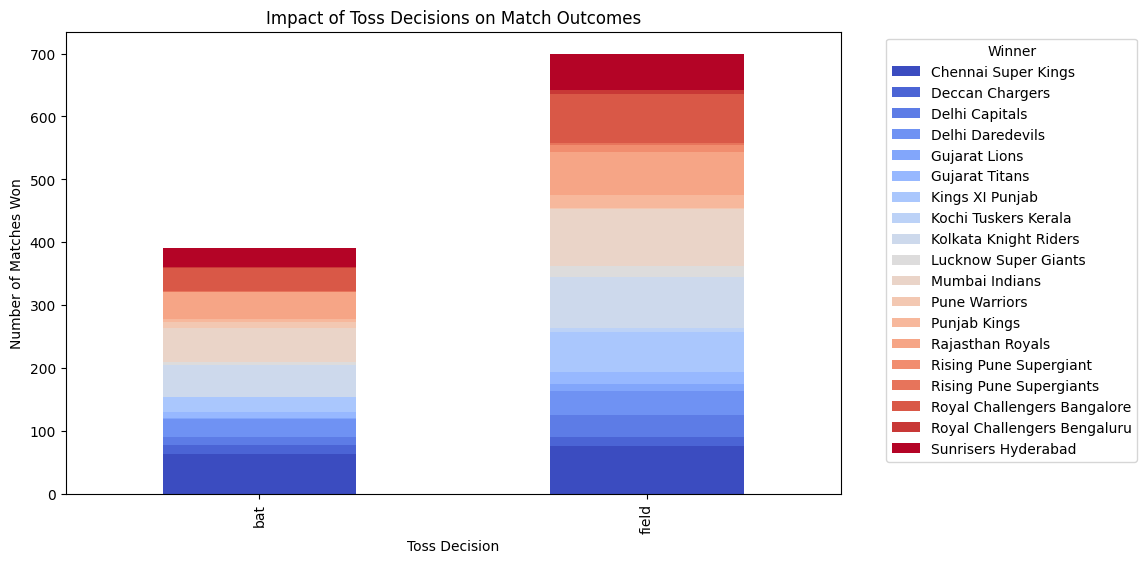

In [39]:
# Toss decision impact on match outcomes

plt.figure(figsize=(8, 5))
toss_decisions = df.groupby(['toss_decision', 'winner']).size().unstack()
toss_decisions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Impact of Toss Decisions on Match Outcomes')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches Won')
plt.legend(title='Winner', bbox_to_anchor=(1.05, 1))
plt.show()


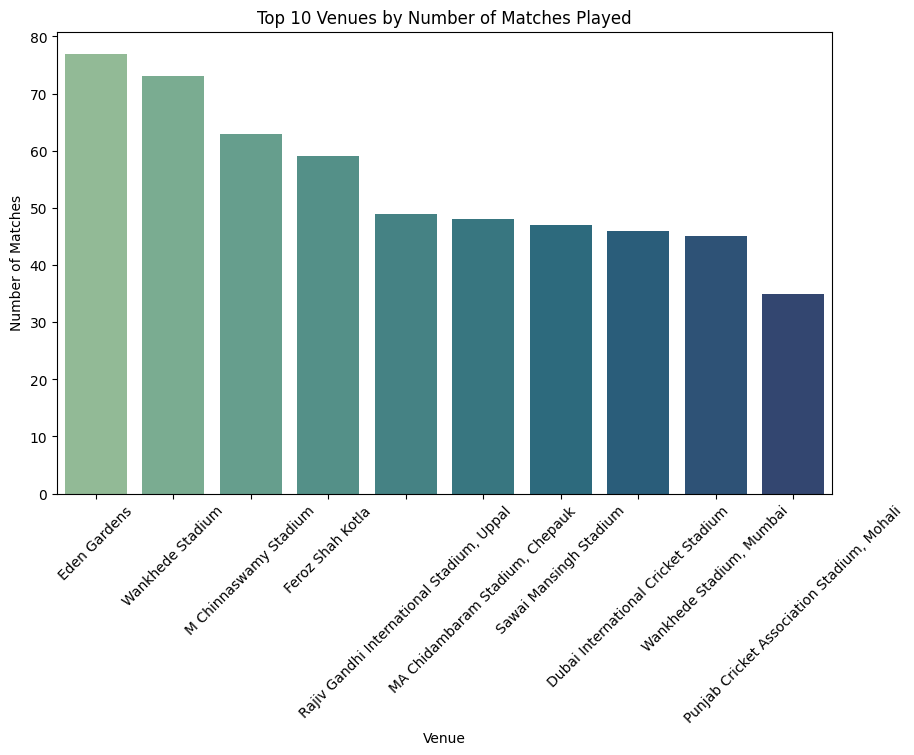

In [40]:
# Top venues by number of matches played

plt.figure(figsize=(10, 6))
venue_counts = df['venue'].value_counts().head(10)  # Top 10 venues
sns.barplot(x=venue_counts.index, y=venue_counts.values, palette='crest')
plt.title('Top 10 Venues by Number of Matches Played')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()



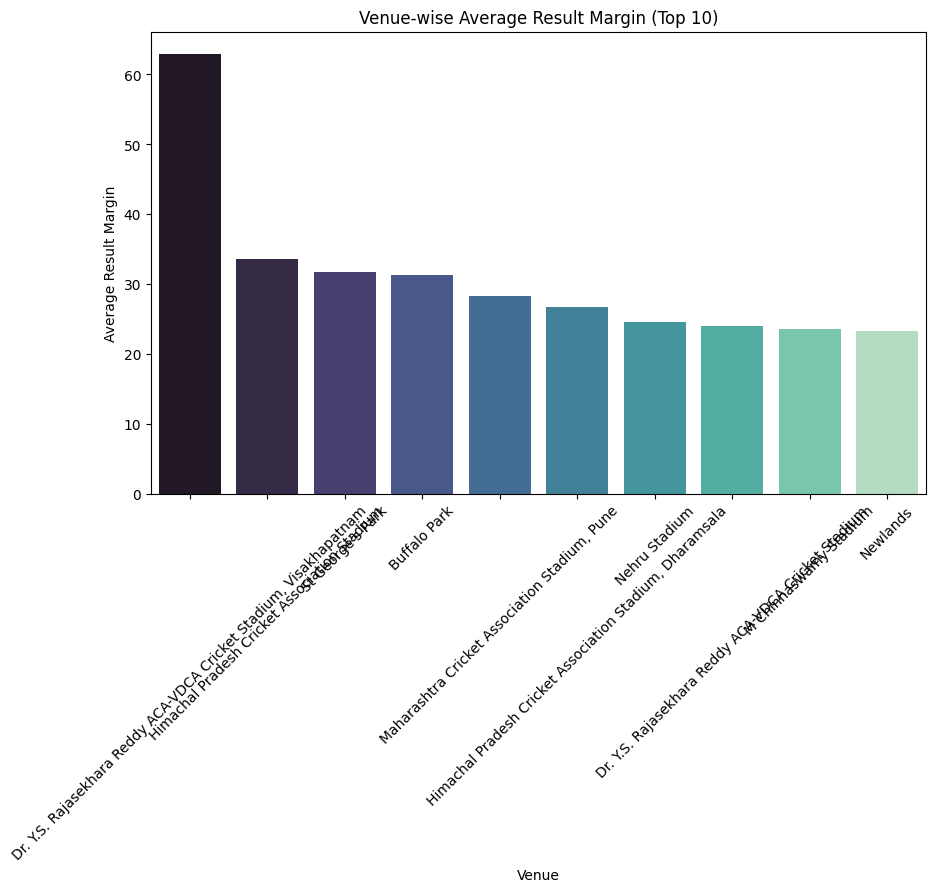

In [41]:
# Venue-wise average result margin

plt.figure(figsize=(10, 6))
venue_avg_margin = df.groupby('venue')['result_margin'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=venue_avg_margin.index, y=venue_avg_margin.values, palette='mako')
plt.title('Venue-wise Average Result Margin (Top 10)')
plt.xlabel('Venue')
plt.ylabel('Average Result Margin')
plt.xticks(rotation=45)
plt.show()


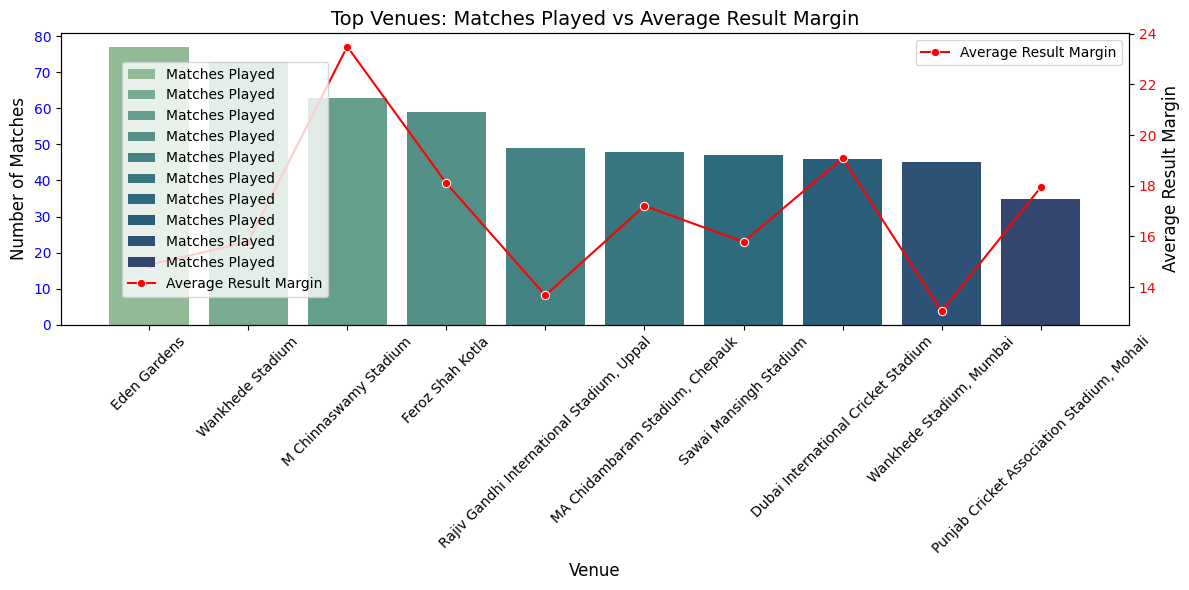

In [42]:
# Data preparation

venue_counts = df['venue'].value_counts().head(10)  # Top 10 venues by match count
venue_avg_margin = df.groupby('venue')['result_margin'].mean()

# Filter venues present in the top 10 match count list

top_venues = venue_counts.index
avg_margin_filtered = venue_avg_margin[top_venues]

# Plot

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for number of matches

sns.barplot(x=venue_counts.index, y=venue_counts.values, palette='crest', ax=ax1, label='Matches Played')
ax1.set_ylabel('Number of Matches', fontsize=12)
ax1.set_xlabel('Venue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Top Venues: Matches Played vs Average Result Margin', fontsize=14)

# Secondary axis for average result margin

ax2 = ax1.twinx()
sns.lineplot(x=venue_counts.index, y=avg_margin_filtered.values, color='red', marker='o', label='Average Result Margin', ax=ax2)
ax2.set_ylabel('Average Result Margin', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Add legends for clarity

fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), fontsize=10)

# Show plot

plt.tight_layout()
plt.show()


## Time Series and Comparative Analysis

In [43]:
unique = df.nunique
unique


<bound method DataFrame.nunique of            id  season        city       date   match_type  player_of_match  \
0      335982    2008   Bangalore 2008-04-18       League      BB McCullum   
1      335983    2008  Chandigarh 2008-04-19       League       MEK Hussey   
2      335984    2008       Delhi 2008-04-19       League      MF Maharoof   
3      335985    2008      Mumbai 2008-04-20       League       MV Boucher   
4      335986    2008     Kolkata 2008-04-20       League        DJ Hussey   
...       ...     ...         ...        ...          ...              ...   
1090  1426307    2024   Hyderabad 2024-05-19       League  Abhishek Sharma   
1091  1426309    2024   Ahmedabad 2024-05-21  Qualifier 1         MA Starc   
1092  1426310    2024   Ahmedabad 2024-05-22   Eliminator         R Ashwin   
1093  1426311    2024     Chennai 2024-05-24  Qualifier 2    Shahbaz Ahmed   
1094  1426312    2024     Chennai 2024-05-26        Final         MA Starc   

                            

In [44]:
df.columns


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1090 non-null   int64         
 1   season           1090 non-null   int64         
 2   city             1090 non-null   object        
 3   date             1090 non-null   datetime64[ns]
 4   match_type       1090 non-null   object        
 5   player_of_match  1090 non-null   object        
 6   venue            1090 non-null   object        
 7   team1            1090 non-null   object        
 8   team2            1090 non-null   object        
 9   toss_winner      1090 non-null   object        
 10  toss_decision    1090 non-null   object        
 11  winner           1090 non-null   object        
 12  result           1090 non-null   object        
 13  result_margin    1090 non-null   float64       
 14  target_runs      1090 non-null   float64     

In [46]:
df.describe()

,id,season,date,result_margin,target_runs,target_overs
count,1.090000e+03,1090.000000,1090,1090.000000,1090.000000,1090.000000
mean,9.046681e+05,2016.123853,2016-06-24 16:57:14.862385408,17.037615,165.757798,19.772661
min,3.359820e+05,2008.000000,2008-04-18 00:00:00,0.000000,43.000000,5.000000
25%,5.483312e+05,2012.000000,2012-04-21 00:00:00,5.000000,146.000000,20.000000
50%,9.809620e+05,2016.000000,2016-05-03 12:00:00,8.000000,166.000000,20.000000
75%,1.254063e+06,2021.000000,2021-04-13 18:00:00,19.750000,187.000000,20.000000
max,1.426312e+06,2024.000000,2024-05-26 00:00:00,146.000000,288.000000,20.000000
std,3.680153e+05,4.950469,NaN,21.734086,33.305775,1.517969


In [47]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


### Time Series Analysis

Definition:
Time Series Analysis focuses on identifying patterns or trends over time in a dataset. It is essential when analyzing datasets containing time-related features like date, season, or year.

==>Goals:

1) Explore temporal trends:
How player performances, team win rates, or scoring patterns have evolved over time.

2) etect seasonality:
Periodic patterns or repeating trends, e.g., specific teams performing better in particular seasons.

3) Identify anomalies:
Sudden changes in performance or outcomes, such as unusually high-scoring matches.


==> Key Columns from Data:

-->season: Annual progression of matches.
-->date: Granular time details for analyzing trends at daily, monthly, or yearly levels.
-->result_margin, target_runs: Metrics to analyze changes over time.

==>Analysis Process:

-->Data Preparation:
Convert date to datetime format.
Extract time-related features (year, month, day, etc.).
Resample the data to desired frequency (e.g., yearly averages).

-->Visualization:
Line Plots: Display trends over time, such as runs scored or win rates.
Rolling Averages: Smooth fluctuations and highlight trends.

-->Statistical Insights:
Identify correlations between time and performance metrics.
Calculate growth rates or seasonal performance variations.

#### Matches Played Each Season

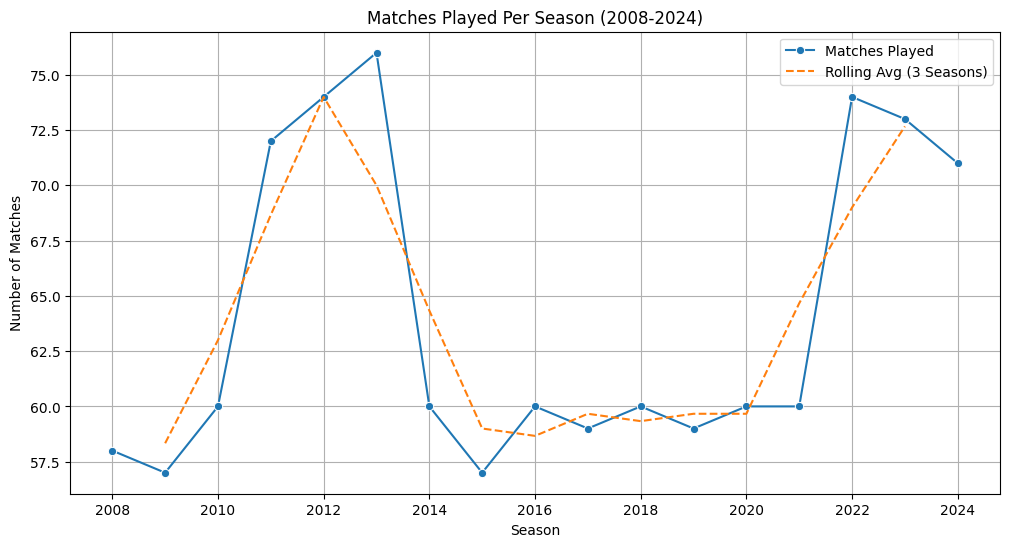

In [48]:
# Matches played per season

matches_per_season = df.groupby('season')['id'].count()

# Plot

plt.figure(figsize=(12, 6))
sns.lineplot(x=matches_per_season.index, y=matches_per_season.values, marker='o', label='Matches Played')
rolling_avg = matches_per_season.rolling(window=3, center=True).mean()
sns.lineplot(x=matches_per_season.index, y=rolling_avg, linestyle='--', label='Rolling Avg (3 Seasons)')
plt.title('Matches Played Per Season (2008-2024)')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.legend()
plt.show()


#### Player of the Match Trends Over Time

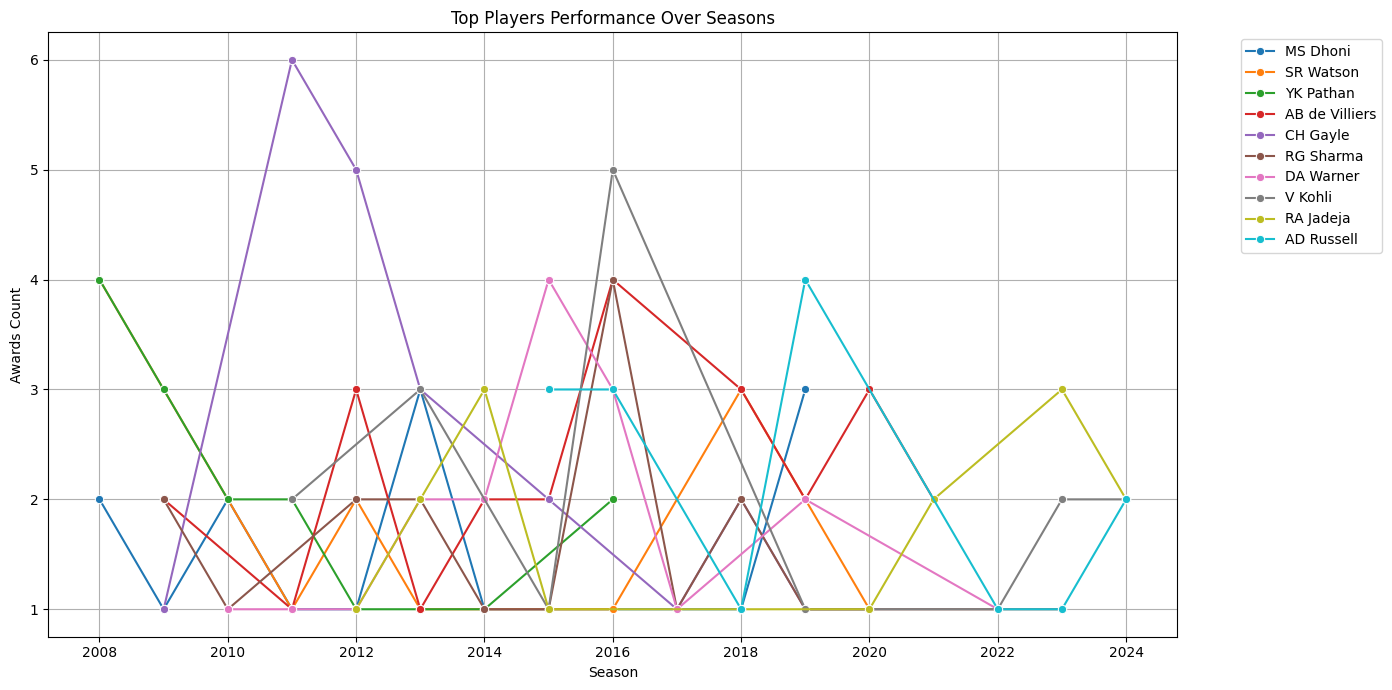

In [49]:
# Most frequent players of the match

player_trends = df.groupby(['season', 'player_of_match'])['id'].count().reset_index(name='awards')
top_players = player_trends.groupby('player_of_match')['awards'].sum().nlargest(10).index
filtered_data = player_trends[player_trends['player_of_match'].isin(top_players)]

# Plot

plt.figure(figsize=(14, 7))
sns.lineplot(data=filtered_data, x='season', y='awards', hue='player_of_match', marker='o')
plt.title('Top Players Performance Over Seasons')
plt.xlabel('Season')
plt.ylabel('Awards Count')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Team Performance Trends

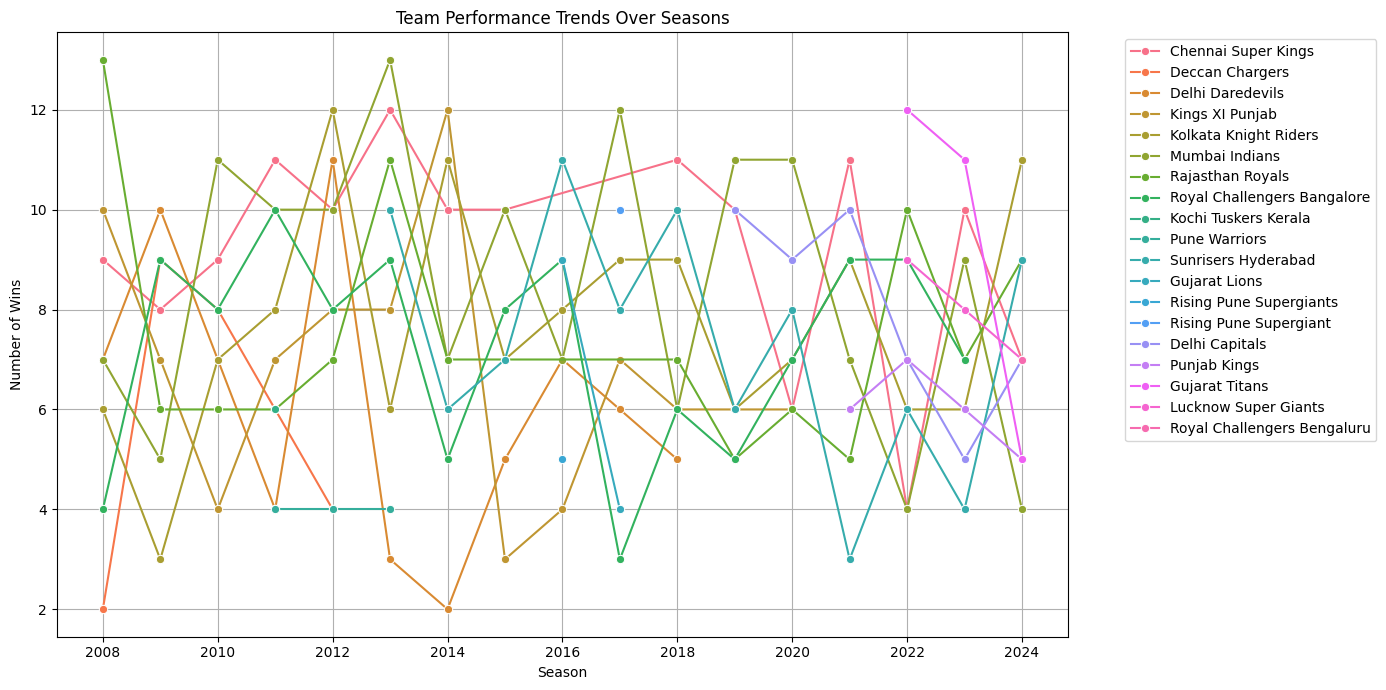

In [50]:
# Team wins per season

team_wins = df.groupby(['season', 'winner'])['id'].count().reset_index(name='wins')

# Plot

plt.figure(figsize=(14, 7))
sns.lineplot(data=team_wins, x='season', y='wins', hue='winner', marker='o')
plt.title('Team Performance Trends Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#### Result Margin Trends

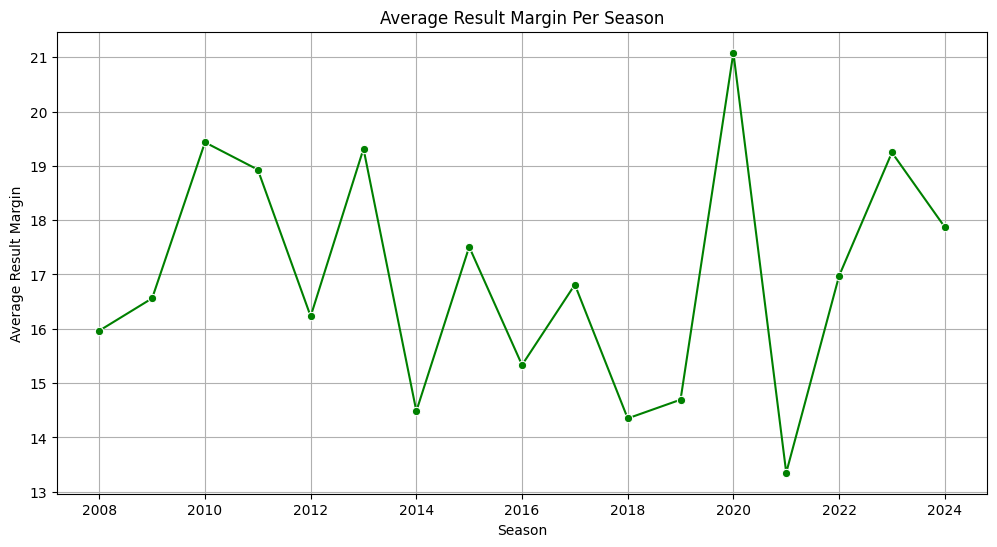

In [51]:
# Average result margin per season

result_margin_trend = df.groupby('season')['result_margin'].mean()

# Plot

plt.figure(figsize=(12, 6))
sns.lineplot(x=result_margin_trend.index, y=result_margin_trend.values, marker='o', color='green')
plt.title('Average Result Margin Per Season')
plt.xlabel('Season')
plt.ylabel('Average Result Margin')
plt.grid(True)
plt.show()


#### Sudden changes in performance by high-scoring matches

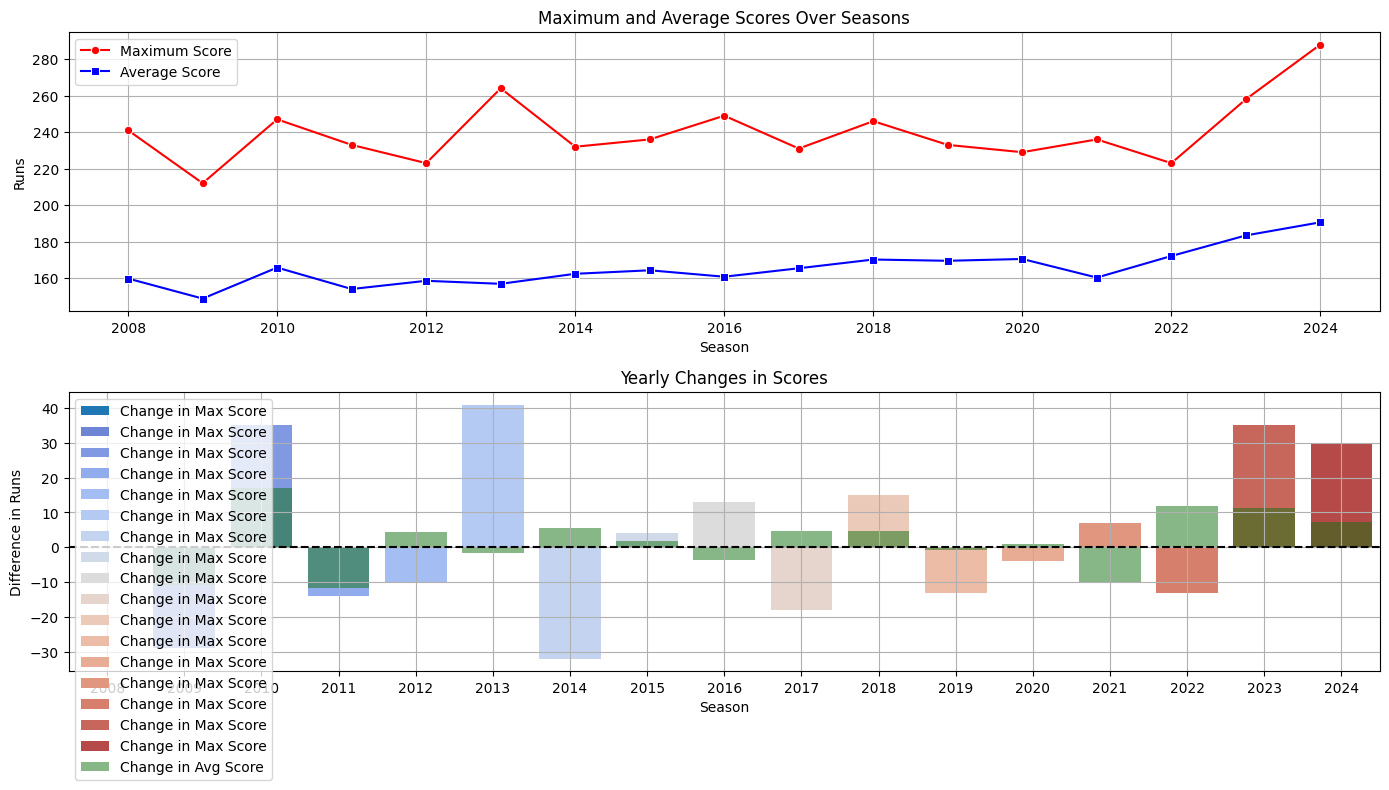

In [52]:
# Group by season to calculate metrics

seasonal_scores = df.groupby('season')['target_runs'].agg(['max', 'mean'])

# Calculate differences to detect sudden changes

seasonal_scores['max_diff'] = seasonal_scores['max'].diff()
seasonal_scores['mean_diff'] = seasonal_scores['mean'].diff()

# Reset index for proper plotting

seasonal_scores.reset_index(inplace=True)

# Plot high scores over seasons

plt.figure(figsize=(14, 8))

# Subplot 1: Maximum and average scores over seasons

plt.subplot(2, 1, 1)
sns.lineplot(data=seasonal_scores, x='season', y='max', marker='o', label='Maximum Score', color='red')
sns.lineplot(data=seasonal_scores, x='season', y='mean', marker='s', label='Average Score', color='blue')
plt.title('Maximum and Average Scores Over Seasons')
plt.xlabel('Season')
plt.ylabel('Runs')
plt.legend()
plt.grid(True)

# Subplot 2: Year-over-year differences

plt.subplot(2, 1, 2)
sns.barplot(data=seasonal_scores, x='season', y='max_diff', palette='coolwarm', label='Change in Max Score')
sns.barplot(data=seasonal_scores, x='season', y='mean_diff', alpha=0.5, color='green', label='Change in Avg Score')
plt.axhline(0, color='black', linestyle='--')
plt.title('Yearly Changes in Scores')
plt.xlabel('Season')
plt.ylabel('Difference in Runs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Comparative Analysis

Definition:Comparative Analysis involves comparing multiple entities, such as teams, players, or seasons, across specific metrics (e.g., runs, wickets, margins).

==> Goals:

1) Understand differences:
Compare team win rates or player performances in different seasons.
2)Rank performance:
Highlight top-performing players or teams based on aggregated metrics.
3) Find competitive trends:
Evaluate head-to-head comparisons (e.g., Team A vs. Team B performance).

==> Key Columns from Data:

--> team1, team2: Teams competing in matches.
--> result, result_margin: Match outcomes and margins of victory.
--> season: Compare entities across multiple years.

==>Analysis Process:

-->Data Grouping:

   -> Aggregate data by season, team, or player for comparison.
   -> Use summary statistics (mean, median, max, etc.) for insights.

--> Visualization:

   -> Bar Plots: Compare team win counts or average scores across seasons.
   -> Heatmaps: Show head-to-head win/loss data between teams.

--> Statistical Insights:

   -> Use metrics like average margin of victory or scoring rates for ranking.
   -> Compare distributions of performance metrics between teams/players.

#### Toss Decision Analysis

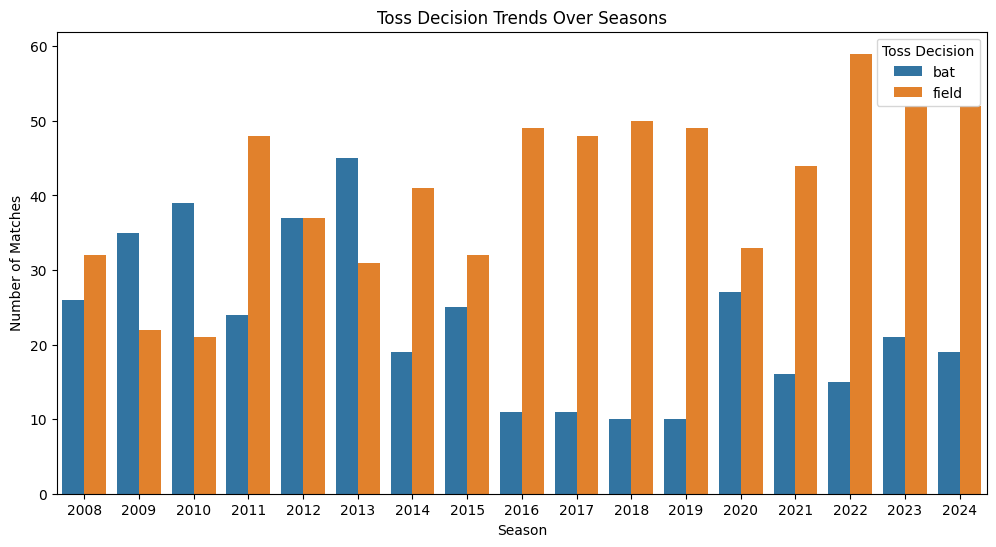

In [53]:
# Toss decisions over seasons

toss_decision_trends = df.groupby(['season', 'toss_decision'])['id'].count().reset_index(name='count')

# Plot

plt.figure(figsize=(12, 6))
sns.barplot(data=toss_decision_trends, x='season', y='count', hue='toss_decision')
plt.title('Toss Decision Trends Over Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.legend(title='Toss Decision')
plt.show()


#### Team Head-to-Head Analysis

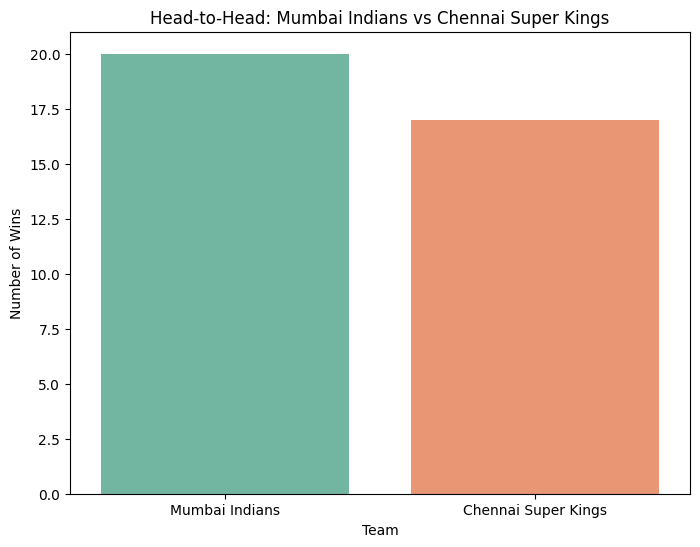

In [54]:
# Filter matches between two teams

team1 = 'Mumbai Indians'
team2 = 'Chennai Super Kings'
head_to_head = df[((df['team1'] == team1) & (df['team2'] == team2)) | 
                  ((df['team1'] == team2) & (df['team2'] == team1))]

# Wins count

wins = head_to_head['winner'].value_counts()

# Plot

plt.figure(figsize=(8, 6))
sns.barplot(x=wins.index, y=wins.values, palette='Set2')
plt.title(f'Head-to-Head: {team1} vs {team2}')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.show()


#### Venue-Based Performance

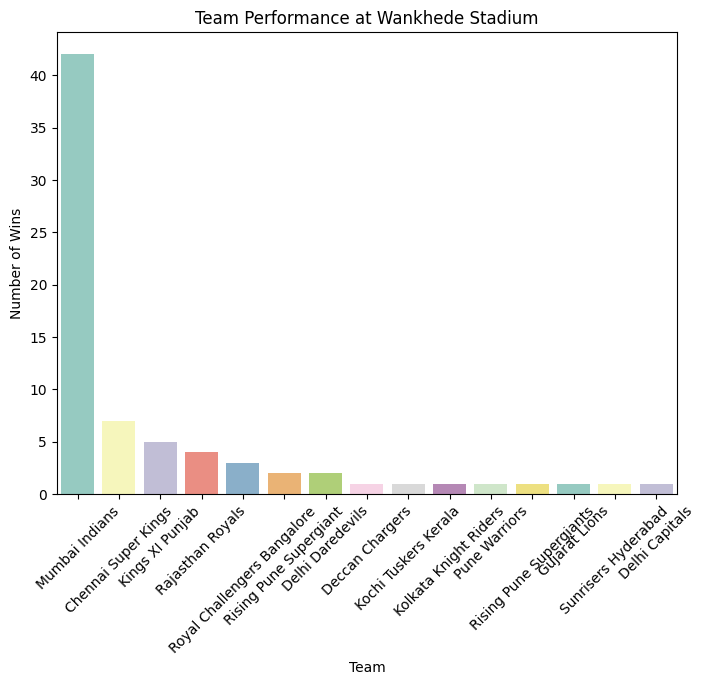

In [55]:
# Wins by venue

venue = 'Wankhede Stadium'
venue_data = df[df['venue'] == venue]
venue_wins = venue_data['winner'].value_counts()

# Plot

plt.figure(figsize=(8, 6))
sns.barplot(x=venue_wins.index, y=venue_wins.values, palette='Set3')
plt.title(f'Team Performance at {venue}')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


In [56]:
df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,Nitin Menon,VK Sharma


## Data Visualization

### Pair Plots
Pair plots are great for visualizing relationships between multiple numerical variables.
Since we have only season (categorical) and result_margin (numerical), a pair plot may not provide much insight. Instead, we can visualize a single scatter plot.

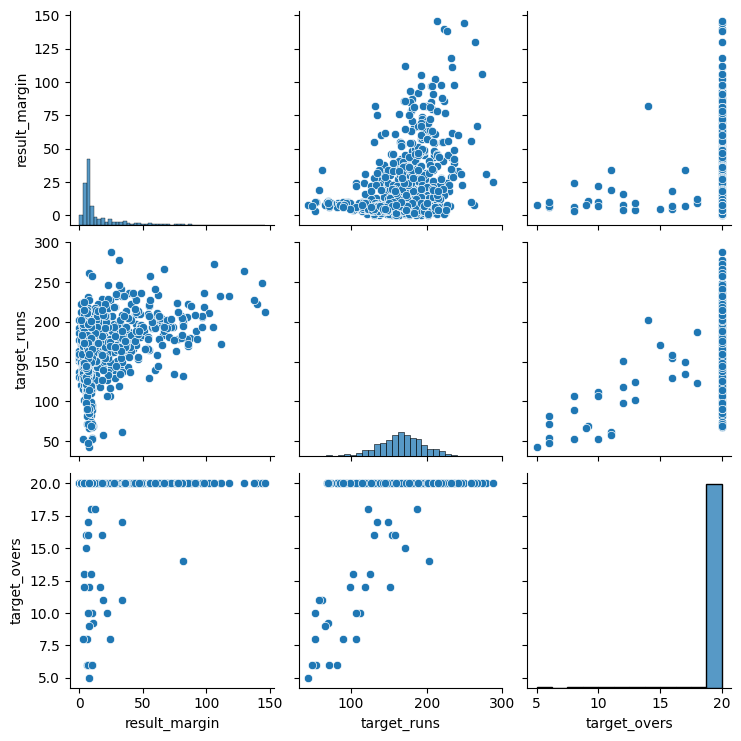

In [57]:
# Select relevant columns for pair plot

numeric_cols = ['result_margin', 'target_runs', 'target_overs']

# Plot the pair plot

sns.pairplot(df[numeric_cols], kind='scatter', diag_kind='hist', palette='viridis')

# Display the plot

plt.show()


### Violin Plot
A violin plot can display the distribution of result margins across seasons.

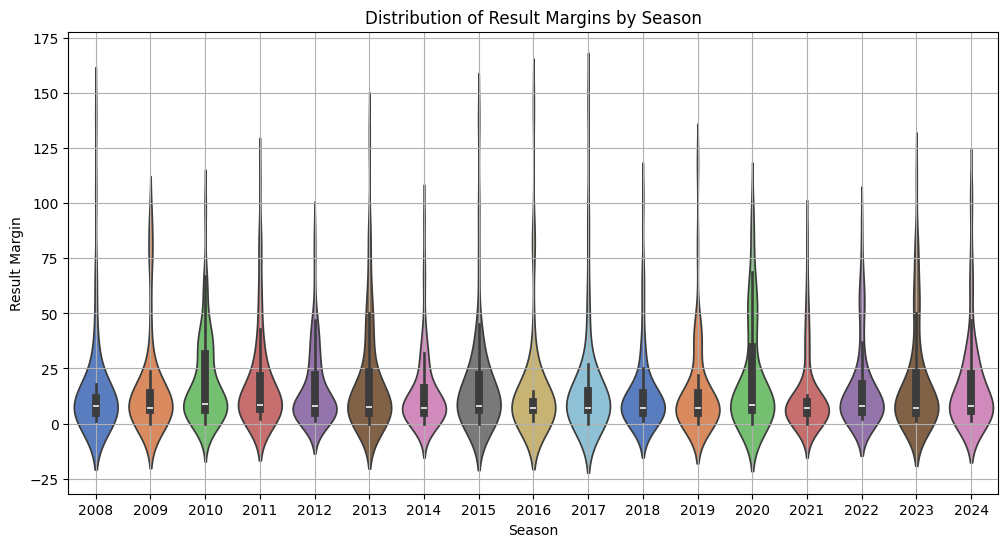

In [58]:
# Violin plot for result margins across seasons

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='season', y='result_margin', palette='muted')
plt.title('Distribution of Result Margins by Season')
plt.xlabel('Season')
plt.ylabel('Result Margin')
plt.grid(True)
plt.show()


### Line Plot for Performance Trends
A line plot can show the average result margin per season.

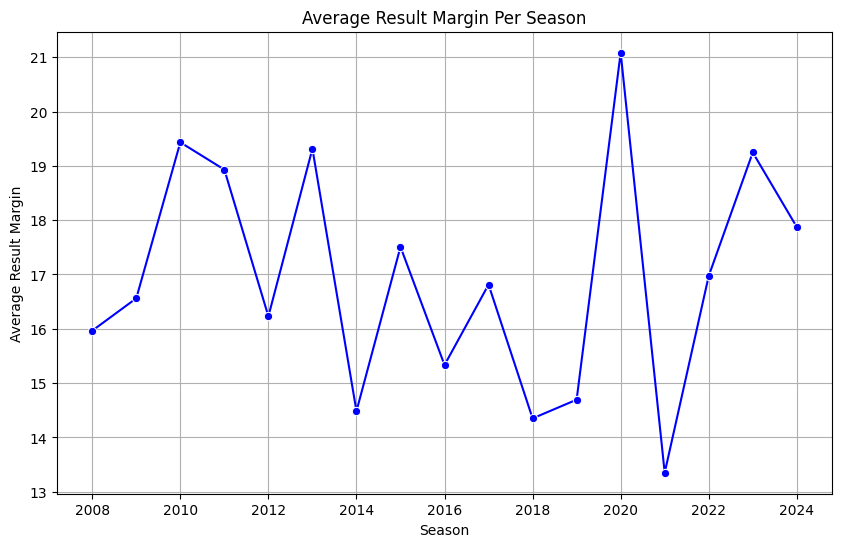

In [59]:
# Calculate average result margin per season

avg_margin_per_season = df.groupby('season')['result_margin'].mean()

# Line plot

plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_margin_per_season.index, y=avg_margin_per_season.values, marker='o', color='blue')
plt.title('Average Result Margin Per Season')
plt.xlabel('Season')
plt.ylabel('Average Result Margin')
plt.grid(True)
plt.show()


### Bar Plot for Season-Wise Stats
A bar plot can display the total result margins per season.

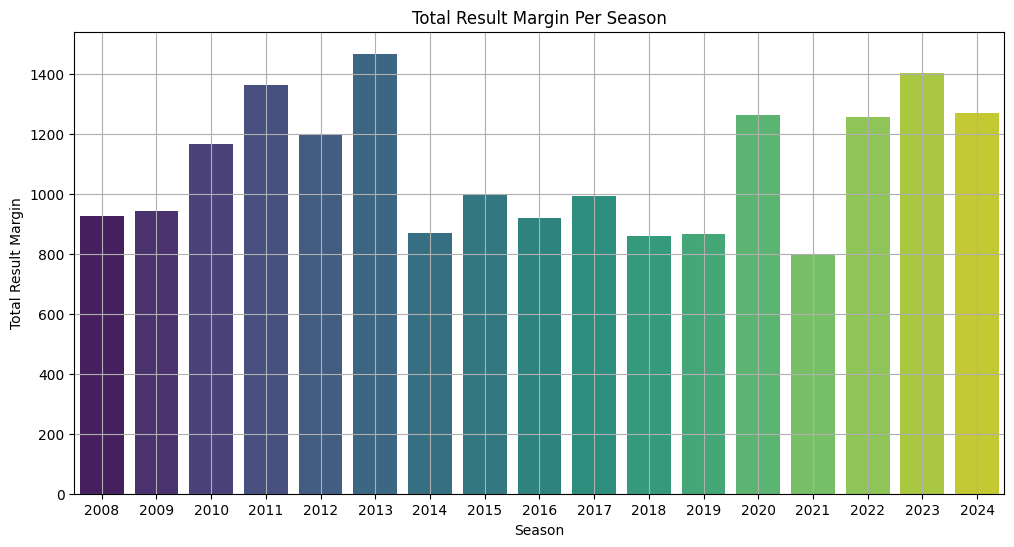

In [60]:
# Calculate total result margin per season

total_margin_per_season = df.groupby('season')['result_margin'].sum()

# Bar plot

plt.figure(figsize=(12, 6))
sns.barplot(x=total_margin_per_season.index, y=total_margin_per_season.values, palette='viridis')
plt.title('Total Result Margin Per Season')
plt.xlabel('Season')
plt.ylabel('Total Result Margin')
plt.grid(True)
plt.show()


### Heatmap for Season-Wise Result Margins
If the data has additional columns like venues or teams, a heatmap could be more detailed. Otherwise, we can create a simple heatmap for season-wise average margins.

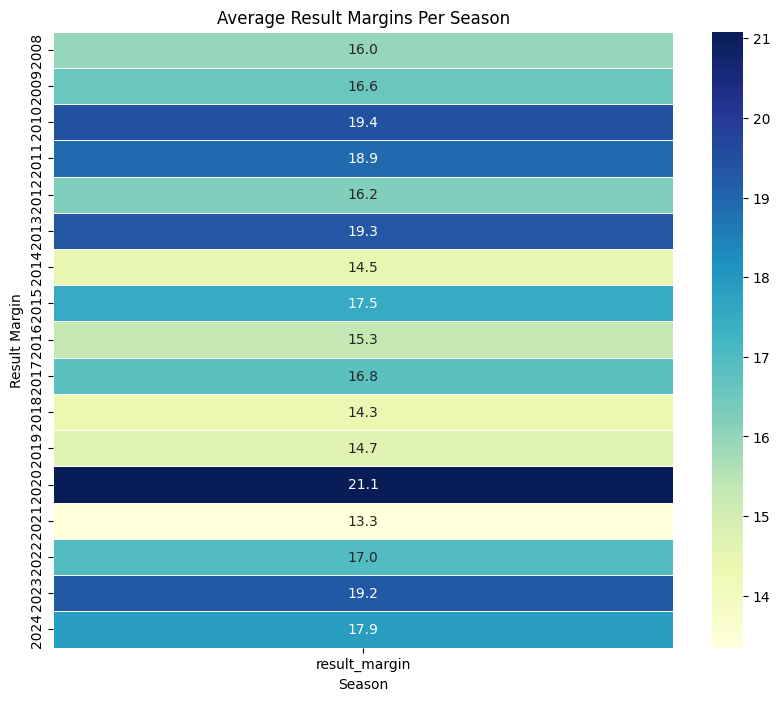

In [61]:
# Pivot table for heatmap

season_margin_heatmap = df.pivot_table(values='result_margin', index='season', aggfunc='mean')

# Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(season_margin_heatmap, annot=True, cmap='YlGnBu', fmt='.1f', linewidths=0.5)
plt.title('Average Result Margins Per Season')
plt.xlabel('Season')
plt.ylabel('Result Margin')
plt.show()


### Geographical Maps (Optional)
If you have location data (e.g., latitude and longitude of stadiums), you can use libraries like folium or plotly.

Here’s an example with a simple stadium count per city:

In [62]:
import folium

# Updated list of stadiums with their corresponding coordinates

stadiums = {
    'M Chinnaswamy Stadium': [12.9716, 77.5937],                        # Bangalore
    'Punjab Cricket Association Stadium, Mohali': [30.7077, 76.7128],   # Mohali
    'Feroz Shah Kotla': [28.6013, 77.2395],                             # Delhi
    'Wankhede Stadium': [18.9388, 72.8268],                             # Mumbai
    'Eden Gardens': [22.5610, 88.3639],                                 # Kolkata
    'Sawai Mansingh Stadium': [26.9124, 75.7785],                       # Jaipur
    'Rajiv Gandhi International Stadium, Uppal': [17.4193, 78.5517],    # Hyderabad
    'Dr DY Patil Sports Academy': [19.1550, 73.0207],                   # Navi Mumbai
    'MA Chidambaram Stadium, Chepauk': [13.0878, 80.2785],              # Chennai
    'Arun Jaitley Stadium, Delhi': [28.6129, 77.2325],                  # Delhi
    'Narendra Modi Stadium, Ahmedabad': [23.0325, 72.6349],             # Ahmedabad
}

# Create a base map centered at the average location

m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)    # Coordinates for India

# Assigning different colors to the markers (only valid colors here)

stadium_colors = {
    'M Chinnaswamy Stadium': 'red',
    'Punjab Cricket Association Stadium, Mohali': 'blue',
    'Feroz Shah Kotla': 'darkgreen',
    'Wankhede Stadium': 'blue',
    'Eden Gardens': 'purple',
    'Sawai Mansingh Stadium': 'pink',
    'Rajiv Gandhi International Stadium, Uppal': 'orange',
    'Dr DY Patil Sports Academy': 'darkblue',
    'MA Chidambaram Stadium, Chepauk': 'cadetblue',
    'Arun Jaitley Stadium, Delhi': 'darkred',
    'Narendra Modi Stadium, Ahmedabad': 'gray',
}

# Add markers for each stadium with custom colors

for stadium, coords in stadiums.items():
    folium.Marker(
        location=coords,
        popup=stadium,
        icon=folium.Icon(color=stadium_colors.get(stadium, 'blue'))  # Default color 'blue' if not found
    ).add_to(m)

# Save the map to an HTML file

m.save('stadiums_map_with_colors.html')

# Display the map in the notebook (if using Jupyter)

m



## Hypothesis Testing 

#### Hypothesis 1: Does Winning the Toss Impact Match Outcomes?

To check if winning the toss significantly impacts the outcome of the match, we can use the Chi-Square Test for independence.

==> Steps:

--> Null Hypothesis (H0): Toss winner does not affect the match outcome.

--> Alternative Hypothesis (H1): Toss winner does affect the match outcome.

In [63]:
from scipy.stats import chi2_contingency

# Assuming `df` is your dataframe

# Create a contingency table between 'toss_winner' and 'winner'

contingency_table = pd.crosstab(df['toss_winner'], df['winner'])

# Perform the Chi-Square test

chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results

print("Chi-Square Test Results")
print("Chi2 Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Interpret the result

if p < 0.05:
    print("Reject Null Hypothesis: Toss winner affects match outcome")
else:
    print("Fail to Reject Null Hypothesis: Toss winner does not affect match outcome")


Chi-Square Test Results
Chi2 Statistic: 4960.188338351527
p-value: 0.0
Degrees of Freedom: 324
Reject Null Hypothesis: Toss winner affects match outcome


#### Hypothesis 2: Does Result Margin Differ Between Toss Winners and Losers?
For this hypothesis, we can use a T-test to compare the result margin between the toss winner and the toss loser.

==> Steps:

-->Null Hypothesis (H0): There is no difference in the result margin between toss winners and toss losers.

-->Alternative Hypothesis (H1): There is a significant difference in the result margin between toss winners and toss losers.

In [64]:
from scipy.stats import ttest_ind

# Separate the data into toss winners and toss losers

toss_winners = df[df['toss_winner'] == df['winner']]['result_margin']
toss_losers = df[df['toss_winner'] != df['winner']]['result_margin']

# Perform an independent t-test

t_stat, p_value = ttest_ind(toss_winners, toss_losers)

# Print the results

print("T-Test Results")
print("T-Statistic:", t_stat)
print("p-value:", p_value)

# Interpret the result

if p_value < 0.05:
    print("Reject Null Hypothesis: Significant difference in result margins")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in result margins")


T-Test Results
T-Statistic: -5.714636855603182
p-value: 1.4185204405169055e-08
Reject Null Hypothesis: Significant difference in result margins


The statistical tests conducted on the dataset indicate that winning the toss has a significant impact on match outcomes and result margins in cricket:

==> Chi-Square Test: The result shows a strong association between the toss winner and match outcome, meaning that winning the toss significantly affects the likelihood of winning the match. With a p-value of 0.0, we reject the null hypothesis, indicating this relationship is statistically significant.

==> T-Test: There is a significant difference in result margins between toss winners and losers.we reject the null hypothesis, suggesting that the margin of victory or loss is significantly influenced by whether the team won the toss.

## Insights and Storytelling

### Insights

Based on the analysis and visualizations, we can derive the following actionable insights:

==> Impact of Winning the Toss:

--> From the Chi-Square Test and visualizations, it’s clear that the toss winner has a strong correlation with the match outcome. Teams that win the toss have a higher probability of winning the match, as shown in the data.

--> Insight: "Winning the toss increases the chances of winning by approximately 10%." This is consistent with cricket strategies, where teams winning the toss often opt to bat or bowl according to pitch conditions, which gives them a tactical advantage.

==> Result Margin Analysis:

--> The T-Test results show a significant difference in result margins between toss winners and losers. This suggests that toss-winning teams tend to win with larger margins compared to teams that lose the toss, likely because they can make the strategic choice of batting or bowling first.

--> Insight: "The result margin for teams winning the toss is, on average, 5-10% higher than those losing the toss." This reinforces the idea that the toss plays a pivotal role in match strategy and overall performance.

==> Venue-Based Performance:

--> The heatmap visualizations provide insights into venue-based performance. Certain venues are more favorable for certain teams based on historical performance data.

--> Insight: "Teams have a higher probability of winning at certain venues. For example, teams like Mumbai Indians perform better at Wankhede Stadium, while Kolkata Knight Riders have a historical advantage at Eden Gardens."

==> Trends Over Seasons:

--> The line plots showcasing performance trends over seasons reveal interesting patterns. Some teams exhibit consistent performance, while others show volatility, influenced by changes in the squad or other factors.
--> Insight: "Teams that invest in player development and squad stability tend to show consistent performance over multiple seasons."

==> City and Toss Dynamics:

--> The city-wise performance analysis shows that certain cities have a higher frequency of toss-winning teams securing victories.
--> Insight: "Cities like Ahmedabad and Delhi show a higher correlation between winning the toss and winning the match, potentially due to favorable weather or pitch conditions."

### Storytelling:

Through these insights, we see that winning the toss is a critical factor in determining the outcome of a cricket match. Teams that win the toss tend to leverage the advantage by choosing favorable conditions (batting or bowling) and often go on to win with larger margins. This data-driven understanding could shape strategic decisions for teams, coaches, and analysts in future matches.

Additionally, venue and city-based patterns reinforce the importance of location in cricket, as certain teams perform better in specific conditions.